# [CDAF] Atividade 1

## Nome e matrícula
Nome: Antônio Caetano Neves Neto
Matrícula: 2022043698

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre aleatoriedade e previsão a partir dos dados de
súmula.


Para isso utilizaremos o dataset "Soccer Prediction Challenge", disponível no Moodle.

## Questão 1
- Carregue o dataset 'TrainingSet_2023_02_08'
- Crie 4 histogramas: 
    a) um para a quantidade de gols marcados por jogo pelos times mandantes
    b) um para a quantidade de gols marcados por jogo pelos time visitantes
    c) um para a quantidade total de gols em cada partida
    d) um para a diferença de gols por partida
- Caso hajam jogos com erros claros de anotação, destaque-os e remova-os antes de gerar os histogramas.
- Calcule o mínimo, o máximo e a média dos valores representados em cada um dos 4 histogramas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Lendo a base de dados
df = pd.read_excel("TrainingSet_2023_02_08.xlsx")

In [2]:
# Existe gols negativos?
df[df["HS"] < 0]

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
298336,22-23,SCO3,11/02/2023,Airdrie United,Dunfermline Athletic,-1,-1,0,D
299208,22-23,ZAF1,17/02/2023,Orlando Pirates,Maritzburg United,-1,-1,0,D
299209,22-23,ZAF1,18/02/2023,Kaizer Chiefs,Golden Arrows,-1,-1,0,D
299210,22-23,ZAF1,18/02/2023,Sekhukhune United,Richards Bay FC,-1,-1,0,D
299211,22-23,ZAF1,18/02/2023,AmaZulu,Tim Sukazi Galaxy,-1,-1,0,D
299212,22-23,ZAF1,19/02/2023,Bloemfontein Celtic,SuperSport United,-1,-1,0,D
299213,22-23,ZAF1,19/02/2023,Cape Town City FC,Moroka Swallows,-1,-1,0,D


In [3]:
# Existe dados faltantes?
df[df["HS"].isna()]

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL


In [4]:
df.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L


In [5]:
# Limpando o dataframe

df = df[~(df["HS"] < 0)]
df = df[~(df["AS"] < 0)]

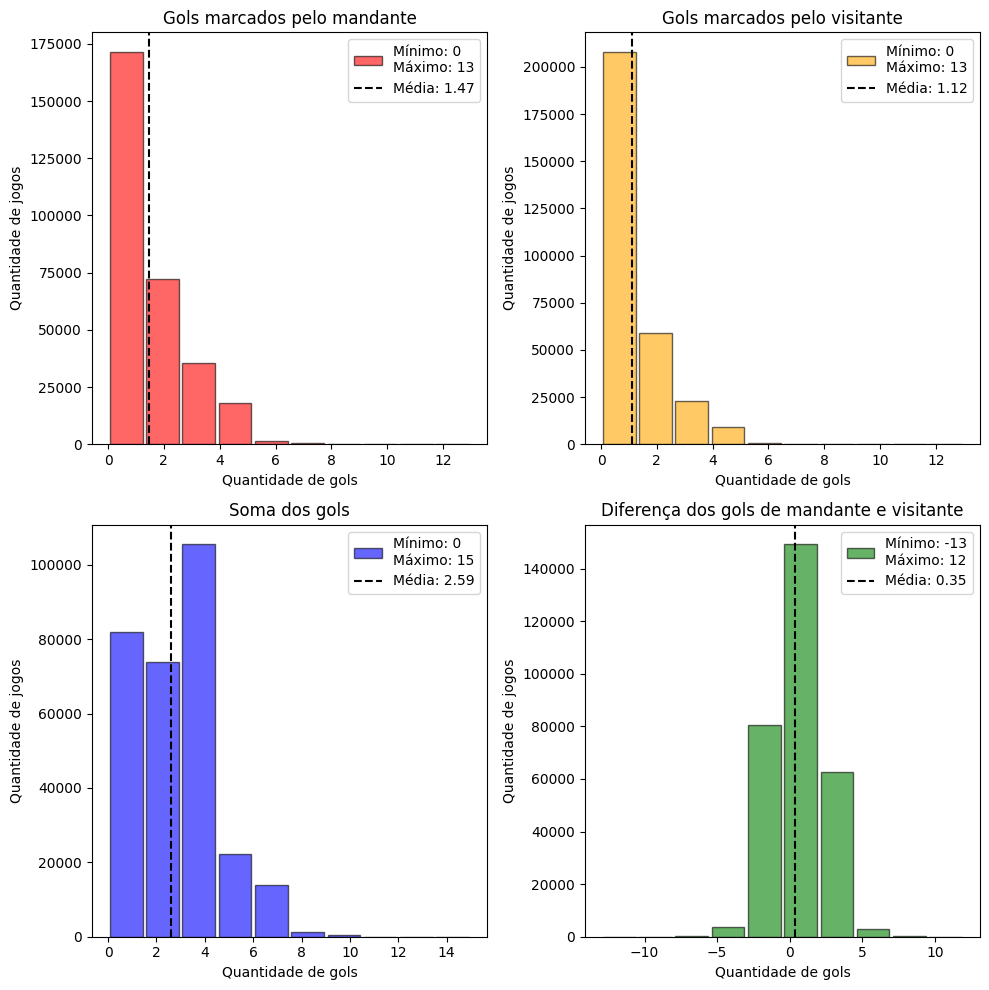

In [6]:
# Criando a forma da plotagem
figure, axis = plt.subplots(2, 2, figsize=(10, 10))

# Plot da quantidade de gols marcados por jogo pelos times mandantes
df["HS"].hist(ax=axis[0, 0], grid=False, color="red", alpha=0.6, edgecolor='black', rwidth=0.9, 
              label=f"Mínimo: {df['HS'].min()}\nMáximo: {df['HS'].max()}")
axis[0, 0].set_title("Gols marcados pelo mandante")
axis[0, 0].set_xlabel("Quantidade de gols")
axis[0, 0].set_ylabel("Quantidade de jogos")
axis[0, 0].axvline(df["HS"].mean(), color='black', linestyle='--', label=f"Média: {round(df['HS'].mean(), 2)}")
axis[0, 0].legend()

# Plot da quantidade de gols marcados por jogo pelos times visitantes
df["AS"].hist(ax=axis[0, 1], grid=False, color="orange", alpha=0.6, edgecolor='black', rwidth=0.9,
              label=f"Mínimo: {df['AS'].min()}\nMáximo: {df['AS'].max()}")
axis[0, 1].set_title("Gols marcados pelo visitante")
axis[0, 1].set_xlabel("Quantidade de gols")
axis[0, 1].set_ylabel("Quantidade de jogos")
axis[0, 1].axvline(df["AS"].mean(), color='black', linestyle='--', label=f"Média: {round(df['AS'].mean(), 2)}")
axis[0, 1].legend()

# Plot da quantidade de gols marcados por jogo
total_goals = (df["HS"] + df["AS"])
total_goals.hist(ax=axis[1, 0], grid=False, color="blue", alpha=0.6, edgecolor='black', rwidth=0.9,
                 label=f"Mínimo: {total_goals.min()}\nMáximo: {total_goals.max()}")
axis[1, 0].set_title("Soma dos gols")
axis[1, 0].set_xlabel("Quantidade de gols")
axis[1, 0].set_ylabel("Quantidade de jogos")
axis[1, 0].axvline(total_goals.mean(), color='black', linestyle='--', label=f"Média: {round(total_goals.mean(), 2)}")
axis[1, 0].legend()

# Plot da quantidade de gols marcados por jogo pelos times mandantes
df["GD"].hist(ax=axis[1, 1], grid=False, color="green", alpha=0.6, edgecolor='black', rwidth=0.9,
              label=f"Mínimo: {df['GD'].min()}\nMáximo: {df['GD'].max()}")
axis[1, 1].set_title("Diferença dos gols de mandante e visitante")
axis[1, 1].set_xlabel("Quantidade de gols")
axis[1, 1].set_ylabel("Quantidade de jogos")
axis[1, 1].axvline(df['GD'].mean(), color='black', linestyle='--', label=f"Média: {round(df['GD'].mean(), 2)}")
axis[1, 1].legend()

plt.tight_layout()
plt.show()

## Questão 2
- Escolha uma temporada já finalizada de alguma das ligas presentes no dataset.
- Repita os 4 histogramas da questão 1 utilizando apenas dados do campeonato selecionado.
- Quais as diferenças entre os histogramas da questão 1 e da questão 2? O que isso pode indicar sobre as características da liga escolhida quando comparada ao todo?

In [7]:
# A liga escolhida foi 'ITA1' e a temporada 21-22
league = "ITA1"
season = "21-22"

df_league = df.query(f"Lge == '{league}' & Sea == '{season}'")
df_league = df_league.reset_index(drop=True)

df_league

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,21-22,ITA1,21/08/2021,Hellas Verona,Sassuolo,2,3,-1,L
1,21-22,ITA1,21/08/2021,Internazionale Milano,Genoa,4,0,4,W
2,21-22,ITA1,21/08/2021,Empoli,Lazio,1,3,-2,L
3,21-22,ITA1,21/08/2021,Torino,Atalanta,1,2,-1,L
4,21-22,ITA1,22/08/2021,Bologna,Salernitana,3,2,1,W
...,...,...,...,...,...,...,...,...,...
375,21-22,ITA1,22/05/2022,Spezia,Napoli,0,3,-3,L
376,21-22,ITA1,22/05/2022,Internazionale Milano,Sampdoria,3,0,3,W
377,21-22,ITA1,22/05/2022,Sassuolo,AC Milan,0,3,-3,L
378,21-22,ITA1,22/05/2022,Venezia,Cagliari,0,0,0,D


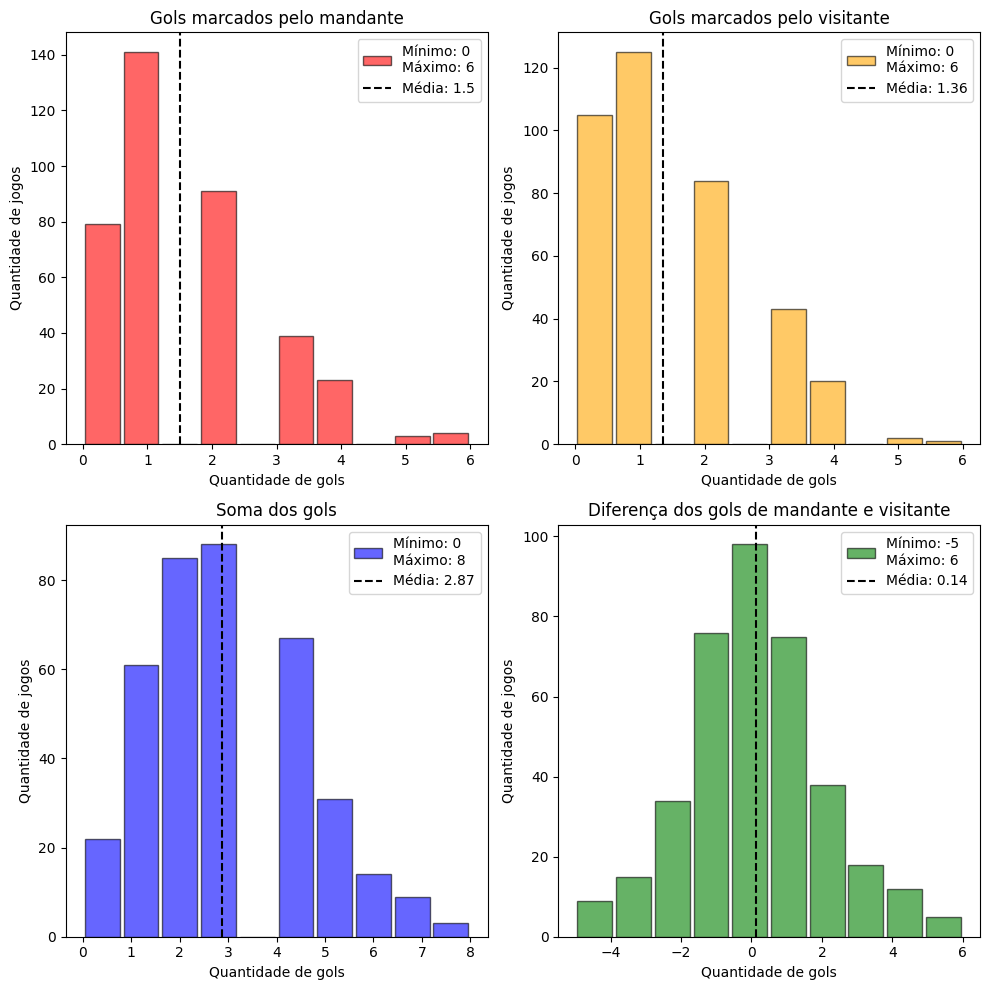

In [8]:
# Criando a forma da plotagem
figure, axis = plt.subplots(2, 2, figsize=(10, 10))

# Plot da quantidade de gols marcados por jogo pelos times mandantes
df_league["HS"].hist(ax=axis[0, 0], grid=False, color="red", alpha=0.6, edgecolor='black', rwidth=0.9, 
              label=f"Mínimo: {df_league['HS'].min()}\nMáximo: {df_league['HS'].max()}")
axis[0, 0].set_title("Gols marcados pelo mandante")
axis[0, 0].set_xlabel("Quantidade de gols")
axis[0, 0].set_ylabel("Quantidade de jogos")
axis[0, 0].axvline(df_league["HS"].mean(), color='black', linestyle='--', label=f"Média: {round(df_league['HS'].mean(), 2)}")
axis[0, 0].legend()

# Plot da quantidade de gols marcados por jogo pelos times visitantes
df_league["AS"].hist(ax=axis[0, 1], grid=False, color="orange", alpha=0.6, edgecolor='black', rwidth=0.9,
              label=f"Mínimo: {df_league['AS'].min()}\nMáximo: {df_league['AS'].max()}")
axis[0, 1].set_title("Gols marcados pelo visitante")
axis[0, 1].set_xlabel("Quantidade de gols")
axis[0, 1].set_ylabel("Quantidade de jogos")
axis[0, 1].axvline(df_league["AS"].mean(), color='black', linestyle='--', label=f"Média: {round(df_league['AS'].mean(), 2)}")
axis[0, 1].legend()

# Plot da quantidade de gols marcados por jogo
total_goals = (df_league["HS"] + df_league["AS"])
total_goals.hist(ax=axis[1, 0], grid=False, color="blue", alpha=0.6, edgecolor='black', rwidth=0.9,
                 label=f"Mínimo: {total_goals.min()}\nMáximo: {total_goals.max()}")
axis[1, 0].set_title("Soma dos gols")
axis[1, 0].set_xlabel("Quantidade de gols")
axis[1, 0].set_ylabel("Quantidade de jogos")
axis[1, 0].axvline(total_goals.mean(), color='black', linestyle='--', label=f"Média: {round(total_goals.mean(), 2)}")
axis[1, 0].legend()

# Plot da quantidade de gols marcados por jogo pelos times mandantes
df_league["GD"].hist(ax=axis[1, 1], grid=False, color="green", alpha=0.6, edgecolor='black', rwidth=0.9,
              label=f"Mínimo: {df_league['GD'].min()}\nMáximo: {df_league['GD'].max()}")
axis[1, 1].set_title("Diferença dos gols de mandante e visitante")
axis[1, 1].set_xlabel("Quantidade de gols")
axis[1, 1].set_ylabel("Quantidade de jogos")
axis[1, 1].axvline(df_league['GD'].mean(), color='black', linestyle='--', label=f"Média: {round(df_league['GD'].mean(), 2)}")
axis[1, 1].legend()

plt.tight_layout()
plt.show()

**A diferença principal entre os histogramas foi a amplitude existente, onde ao considerar todas as partidas, houve jogos com bastante gols, tornando o máximo bem alto comparado a primeira liga italiana. Isso *pode* indicar um balanceamento maior entre os times, mas cabe análises mais significativas. Ademais, a diferença média de gols entre o mandante e o visitante é menor, isso pode indicar também um maior balanceamento, entretanto, cabe analisar se essa diferença é realmente significativa. Por fim, a média de gols foi superior ao geral, podendo indicar uma temporada de bastante gols em relação a média.**

## Questão 3
- Utilizando apenas dados do campeonato selecionado, crie um dataframe que corresponda à tabela de classificação ao fim da temporada contendo o nome dos times, nº de pontos, jogos, vitórias, empates, derrotas, gols pró, gols contra e saldo de gols. Ordene a classificação por pontos, vitórias, saldo de gols e gols pró.
- Faça o mesmo considerando apenas a primeira metade de jogos.

In [9]:
# Criando as colunas de pontos adquiridos pro mandante e pro visitante
df_league.loc[:, "Points_HT"] = 3*(df_league["WDL"] == "W").astype(int) + 1*(df_league["WDL"] == "D").astype(int)
df_league.loc[:, "Points_AT"] = 3*(df_league["WDL"] == "L").astype(int) + 1*(df_league["WDL"] == "D").astype(int)
df_league.loc[:, "WHT"] = (df_league["WDL"] == "W").astype(int)
df_league.loc[:, "DHT"] = (df_league["WDL"] == "D").astype(int)
df_league.loc[:, "LHT"] = (df_league["WDL"] == "L").astype(int)

df_league.head()

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Points_HT,Points_AT,WHT,DHT,LHT
0,21-22,ITA1,21/08/2021,Hellas Verona,Sassuolo,2,3,-1,L,0,3,0,0,1
1,21-22,ITA1,21/08/2021,Internazionale Milano,Genoa,4,0,4,W,3,0,1,0,0
2,21-22,ITA1,21/08/2021,Empoli,Lazio,1,3,-2,L,0,3,0,0,1
3,21-22,ITA1,21/08/2021,Torino,Atalanta,1,2,-1,L,0,3,0,0,1
4,21-22,ITA1,22/08/2021,Bologna,Salernitana,3,2,1,W,3,0,1,0,0


### Todos os jogos

In [10]:
points = df_league.groupby("AT")["Points_AT"].sum() + df_league.groupby("HT")["Points_HT"].sum()
n_matches = df_league.groupby("AT")["Points_AT"].count() + df_league.groupby("HT")["Points_HT"].count()
n_wins = df_league.groupby("HT")["WHT"].sum() + df_league.groupby("AT")["LHT"].sum()
n_draws = df_league.groupby("HT")["DHT"].sum() + df_league.groupby("AT")["DHT"].sum()
n_losses = df_league.groupby("HT")["LHT"].sum() + df_league.groupby("AT")["WHT"].sum()
pro_goals = df_league.groupby("HT")["HS"].sum() + df_league.groupby("AT")["AS"].sum()
own_goals = df_league.groupby("HT")["AS"].sum() + df_league.groupby("AT")["HS"].sum()
goal_difference = pro_goals - own_goals

In [11]:
pd.DataFrame({
    "Pontos": points,
    "Partidas": n_matches,
    "Vitórias": n_wins,
    "Empates": n_draws,
    "Derrotas": n_losses,
    "Gols pró": pro_goals,
    "Gols contra": own_goals,
    "Saldo de gols": goal_difference
}).sort_values(by="Pontos", ascending=False)

,Pontos,Partidas,Vitórias,Empates,Derrotas,Gols pró,Gols contra,Saldo de gols
AC Milan,86,38,26,8,4,69,31,38
Internazionale Milano,84,38,25,9,4,84,32,52
Napoli,79,38,24,7,7,74,31,43
Juventus,70,38,20,10,8,57,37,20
Lazio,64,38,18,10,10,77,58,19
Roma,63,38,18,9,11,59,43,16
Fiorentina,62,38,19,5,14,59,51,8
Atalanta,59,38,16,11,11,65,48,17
Hellas Verona,53,38,14,11,13,65,59,6
Sassuolo,50,38,13,11,14,64,66,-2


### Metade dos jogos

In [12]:
size = len(df_league) // 2

half_df_league = df_league.loc[:size-1, :]

In [13]:
points = half_df_league.groupby("AT")["Points_AT"].sum() + half_df_league.groupby("HT")["Points_HT"].sum()
n_matches = half_df_league.groupby("AT")["Points_AT"].count() + half_df_league.groupby("HT")["Points_HT"].count()
n_wins = half_df_league.groupby("HT")["WHT"].sum() + half_df_league.groupby("AT")["LHT"].sum()
n_draws = half_df_league.groupby("HT")["DHT"].sum() + half_df_league.groupby("AT")["DHT"].sum()
n_losses = half_df_league.groupby("HT")["LHT"].sum() + half_df_league.groupby("AT")["WHT"].sum()
pro_goals = half_df_league.groupby("HT")["HS"].sum() + half_df_league.groupby("AT")["AS"].sum()
own_goals = half_df_league.groupby("HT")["AS"].sum() + half_df_league.groupby("AT")["HS"].sum()
goal_difference = pro_goals - own_goals

In [14]:
pd.DataFrame({
    "Pontos": points,
    "Partidas": n_matches,
    "Vitórias": n_wins,
    "Empates": n_draws,
    "Derrotas": n_losses,
    "Gols pró": pro_goals,
    "Gols contra": own_goals,
    "Saldo de gols": goal_difference
}).sort_values(by="Pontos", ascending=False)

,Pontos,Partidas,Vitórias,Empates,Derrotas,Gols pró,Gols contra,Saldo de gols
Internazionale Milano,46,19,14,4,1,49,15,34
AC Milan,42,19,13,3,3,40,22,18
Napoli,39,19,12,3,4,35,14,21
Atalanta,38,19,11,5,3,38,24,14
Juventus,34,19,10,4,5,27,17,10
Roma,32,19,10,2,7,31,21,10
Fiorentina,32,19,10,2,7,34,25,9
Lazio,31,19,9,4,6,39,34,5
Empoli,27,19,8,3,8,30,34,-4
Bologna,27,19,8,3,8,27,31,-4


## Questão 4
- Utilizando os jogos da liga escolhida, use regressão de Poisson para criar um modelo de previsão de resultados, como visto nos slides em sala e no Soccermatics.
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson5/plot_SimulateMatches.html
- Dê print no sumário do ajuste
- Simule a partida entre o 1º e o 4º colocado, onde o 1º joga em casa. Primeiro, apresente a quantidade esperada de gols de cada time. Em seguida, apresente um grid com as probabilidades associadas a cada placar possível.

In [15]:
import numpy as np
import seaborn
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import poisson, skellam

In [16]:
ht_part = df_league[["HT", "AT", "HS"]].rename(columns={"HT": "team", "AT": "opponent", "HS": "goals"})
ht_part["home"] = 1

at_part = df_league[["HT", "AT", "AS"]].rename(columns={"HT": "opponent", "AT": "team", "AS": "goals"})
at_part["home"] = 0

goal_model_data = pd.concat([ht_part, at_part])

In [17]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                        family=sm.families.Poisson()).fit()

In [18]:
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1075.2
Date:                Mon, 08 Apr 2024   Deviance:                       739.53
Time:                        14:53:39   Pearson chi2:                     642.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1979
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.0237      0.221     -0.107      0.915      -0.457       0.409
team[T.Atalanta]                     -0.0434      0.173     -0.251      0.802      -0.383       0.296
team[T.Bologna]                      -0.4278      0.193     -2.215      0.027      -0.806      -0.049
team[T.Cagliari]                     -0.6737      0.210     -3.212      0.001      -1.085      -0.263
team[T.Empoli]                       -0.2851      0.186     -1.533      0.125      -0.650       0.079
team[T.Fiorentina]                   -0.1376      0.178     -0.775      0.438      -0.486       0.210
team[T.Genoa]                        -0.9123      0.227     -4.016      0.000      -1.358      -0.467
team[T.Hellas Verona]                -0.0326      0.173     -0.188      0.851      -0.372       0.307
team[T.Internazionale Milano]         0.1981      0.163      1.218      0.223      -0.121       0.517
team[T.Juventus]                     -0.1857      0.179     -1.036      0.300      -0.537       0.165
team[T.Lazio]                         0.1365      0.166      0.822      0.411      -0.189       0.462
team[T.Napoli]                        0.0701      0.168      0.418      0.676      -0.258       0.398
team[T.Roma]                         -0.1454      0.178     -0.819      0.413      -0.493       0.203
team[T.Salernitana]                  -0.6939      0.212     -3.275      0.001      -1.109      -0.279
team[T.Sampdoria]                    -0.3755      0.191     -1.971      0.049      -0.749      -0.002
team[T.Sassuolo]                     -0.0412      0.174     -0.237      0.813      -0.382       0.299
team[T.Spezia]                       -0.4831      0.197     -2.447      0.014      -0.870      -0.096
team[T.Torino]                       -0.3967      0.191     -2.082      0.037      -0.770      -0.023
team[T.Udinese]                      -0.0973      0.176     -0.553      0.580      -0.442       0.248
team[T.Venezia]                      -0.6727      0.210     -3.207      0.001      -1.084      -0.262
opponent[T.Atalanta]                  0.4344      0.231      1.883      0.060      -0.018       0.887
opponent[T.Bologna]                   0.5506      0.225      2.449      0.014       0.110       0.991
opponent[T.Cagliari]                  0.7536      0.217      3.474      0.001       0.328       1.179
opponent[T.Empoli]                    0.7982      0.216      3.695      0.000       0.375       1.222
opponent[T.Fiorentina]                0.4894      0.228      2.146      0.032       0.042       0.936
opponent[T.Genoa]                     0.6215      0.221      2.807      0.005       0.188       1.055
opponent[T.Hellas Verona]             0.6414      0.222      2.888      0.004       0.206       1.077
opponent[T.Internaziona

In [19]:
home_team = "AC Milan"
away_team = "Juventus"

home_score_rate = poisson_model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score_rate = poisson_model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0},index=[1]))

print(home_team + ' contra ' + away_team + ' espera marcar: ' + str(home_score_rate.values[0]))
print(away_team + ' contra ' + home_team + ' espera marcar: ' + str(away_score_rate.values[0]))

AC Milan contra Juventus espera marcar: 1.270652079793239
Juventus contra AC Milan espera marcar: 0.8111280747646976


In [20]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                     index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                     index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

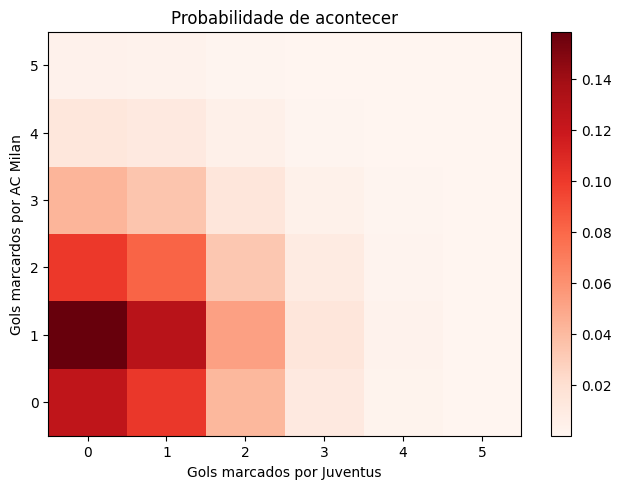

In [21]:
max_goals=5

score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals)

plt.imshow(score_matrix, aspect='auto',cmap=plt.cm.Reds)
plt.colorbar()
plt.title('Probabilidade de acontecer')
plt.xlim((-0.5, max_goals + 0.5))
plt.ylim((-0.5, max_goals + 0.5))
plt.tight_layout()
plt.xlabel('Gols marcados por ' + away_team)
plt.ylabel('Gols marcardos por ' + home_team)
plt.show()

## Questão 5
- Utilize o modelo treinado para simular os placares de todos os jogos da temporada.
- Construa uma tabela de classificação em cima dos resultados esperados. Considere que jogos com uma diferença esperada de gols < 0.5 são empates.
- Compare a tabela real com a simulada. Onde estão as principais diferenças entre elas? E similaridades? Como você interpreta essa comparação? É possível identificar aspectos que o modelo subestima/superestima? É possível identificar tiveram campanhas "sortudas" ou "azaradas"? 

In [22]:
teams = df_league["HT"].unique()

simulation = {team: {"W": 0, "D": 0, "L": 0, "PG": 0, "OG": 0} for team in teams}

for ht in teams:
    for at in teams:
        if ht == at: continue
        home_goals_avg = poisson_model.predict(pd.DataFrame(data={'team': ht,
                                                           'opponent': at, 'home': 1},
                                                     index=[1])).values[0]
        away_goals_avg = poisson_model.predict(pd.DataFrame(data={'team': at,
                                                           'opponent': ht, 'home': 0},
                                                     index=[1])).values[0]

        if abs(home_goals_avg - away_goals_avg) < 0.5:
            simulation[ht]["D"] += 1
            simulation[at]["D"] += 1

            # Equalizando os gols, em caso de empate
            mean_goals = int(round((home_goals + away_goals) / 2))
            
            simulation[ht]["PG"] += mean_goals
            simulation[ht]["OG"] += mean_goals
            simulation[at]["PG"] += mean_goals
            simulation[at]["OG"] += mean_goals

            continue
        
        # Calculando o placar mais provável, dado a distribuição.
        team_pred = [np.array([poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)]) for team_avg in
                 [home_goals_avg, away_goals_avg]]

        team_pred[0] /= np.sum(team_pred[0])
        team_pred[1] /= np.sum(team_pred[1])
        
        home_goals = np.random.choice(len(team_pred[0]), p=team_pred[0])
        away_goals = np.random.choice(len(team_pred[1]), p=team_pred[1])

        if home_goals == away_goals:
            simulation[ht]["D"] += 1
            simulation[at]["D"] += 1

            simulation[ht]["PG"] += home_goals
            simulation[ht]["OG"] += away_goals
            simulation[at]["PG"] += away_goals
            simulation[at]["OG"] += home_goals
        elif home_goals > away_goals:
            simulation[ht]["W"] += 1
            simulation[at]["L"] += 1

            # Ajeitando os gols, caso o placar mais provável seja com gols iguais
            if home_goals == away_goals:
                home_goals = max(1, home_goals)
                away_goals = max(0, away_goals-1)

            simulation[ht]["PG"] += home_goals
            simulation[ht]["OG"] += away_goals
            simulation[at]["PG"] += away_goals
            simulation[at]["OG"] += home_goals
            
        else:
            simulation[ht]["L"] += 1
            simulation[at]["W"] += 1
            
            # Ajeitando os gols, caso o placar mais provável seja com gols iguais
            if home_goals == away_goals:
                home_goals = max(0, home_goals-1)
                away_goals = max(1, away_goals)

            simulation[ht]["PG"] += home_goals
            simulation[ht]["OG"] += away_goals
            simulation[at]["PG"] += away_goals
            simulation[at]["OG"] += home_goals

In [23]:
table = pd.DataFrame(simulation).T
table["Pontos"] = table["W"]*3 + table["D"]
table["Saldo de gols"] = table["PG"] - table["OG"]

table = table.rename({"W": "Vitórias", "D": "Empates", "L": "Perdas", "PG": "Gols Pró", "OG": "Gols contra"})

table.sort_values(by="Pontos", ascending=False)

,W,D,L,PG,OG,Pontos,Saldo de gols
Internazionale Milano,21,16,1,92,36,79,56
Napoli,22,11,5,77,36,77,41
Atalanta,15,18,5,69,44,63,25
AC Milan,15,18,5,66,39,63,27
Hellas Verona,14,19,5,71,53,61,18
Fiorentina,11,23,4,60,46,56,14
Juventus,12,20,6,62,48,56,14
Sampdoria,12,18,8,63,69,54,-6
Sassuolo,11,17,10,58,58,50,0
Udinese,9,20,9,53,60,47,-7


**Ao analisar ambas as tabelas, podemos perceber diferenças significativas nas posições dos times, principalmente em relação ao modelo considerar a superioridade de times mais constantes, como a Internazionale e o Napoli, ambos perdendo poucas vezes, provavelmente com times do mesmo porte. Ao contrário, na parte debaixo da tabela o modelo considera que times normalmente mais fracos não consigam ganhar quase nenhuma vez. Logo, como o modelo leva em consideração gols e mandante ou não, times de maiores saldos valorizaram no modelo, e o contrário também. Assim, campanhas sortudas ou azaradas não são possíveis de identificar, o maior exemplo é o Milan, pois foi o campeão real do torneio, mas como teve um saldo de gols inferior que o Napoli e a Internazionale, ficou para trás na simulação. Já o Internazionale que possuiu um saldo de gols alto na temporada real, foi o primeiro colocado, com o maior número de gols realizados.**